In [ ]:
import numpy as numpy
import pandas as pd
import matplotlib as mpl
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, cross_val_score
import joblib

In [19]:
combined_train = pd.read_csv("combined_train.csv")
combined_test = pd.read_csv("combined_test.csv")
train_metadata = pd.read_csv("train/Features/train_metadata.csv")
test_metadata = pd.read_csv("test/Features/test_metadata.csv")

In [ ]:
class_ids = train_metadata["ClassId"]
test_ids = test_metadata['id']
combined_train = combined_train.drop("image_path", axis = 1)
combined_test = combined_test.drop("image_path", axis=1)

KeyError: "['image_path'] not found in axis"

In [43]:
skf = StratifiedKFold()
scores = []
for train, validation in skf.split(combined_train, class_ids):
    model = RandomForestClassifier(n_estimators=1000, class_weight='balanced')
    model.fit(combined_train.iloc[train], class_ids[train])
    scores.append(model.score(combined_train.iloc[validation], class_ids[validation]))
print(scores)
print(sum(scores)/len(scores))

c:\Users\Elitebook\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:862: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


KeyboardInterrupt: 

In [29]:
def printSigns(accuracies, top_n, reverse=False):
    if reverse == True:
        accuracies = list(reversed(accuracies))
    for i in range(top_n):
        classID = accuracies[i][1]
        mpl.pyplot.subplot(2,top_n//2, i + 1)
        img = mpl.image.imread(f'Sign Images/{classID}.png')
        mpl.pyplot.imshow(img)
    mpl.pyplot.show()

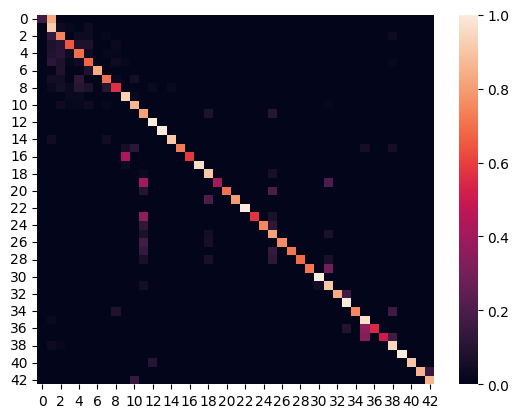

In [38]:
cm = confusion_matrix(class_ids[validation], model.predict(combined_train.iloc[validation]), normalize='true')
sns.heatmap(cm)
class_accuracies = sorted((cm[i][i], i) for i in range(43))

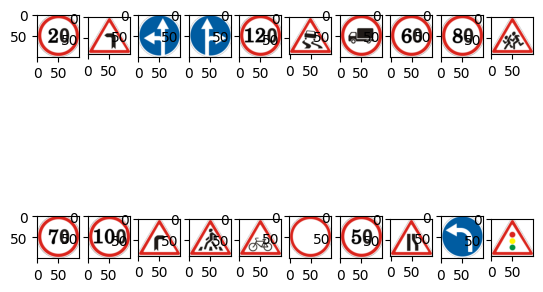

In [39]:
printSigns(class_accuracies, 20)

In [41]:
output = pd.DataFrame()
output["id"] = test_ids
output["ClassId"] = model.predict(combined_test)
output.to_csv("output.csv", index=False)

In [42]:
output

,id,ClassId
0,661,12
1,4477,9
2,1046,2
3,631,4
4,6533,3
...,...,...
2348,2218,11
2349,4952,10
2350,1394,25
2351,3161,38
